# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
rural_total_rides = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_total_rides = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_total_rides = suburban_cities_df.groupby(["city"]).count()["ride_id"]


city_total_rides= pyber_data_df.groupby(["type"]).count()["ride_id"]
city_total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
urban_total_driver = urban_cities_df.groupby(["city"]).sum()["driver_count"]
suburban_total_driver = suburban_cities_df.groupby(["city"]).sum()["driver_count"]
rural_total_driver = rural_cities_df.groupby(["city"]).sum()["driver_count"]

city_driver_total= pyber_data_df.groupby(["type"]).sum()["driver_count"]
city_driver_total

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
urban_fare_total = urban_cities_df.groupby(["city"]).sum()["fare"]
suburban_fare_total = suburban_cities_df.groupby(["city"]).sum()["fare"]
rural_fare_total = rural_cities_df.groupby(["city"]).sum()["fare"]

city_fare_total= pyber_data_df.groupby(["type"]).sum()["fare"]
city_fare_total

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = urban_fare_total / urban_total_rides
suburban_avg_fare = suburban_fare_total / suburban_total_rides
rural_avg_fare =rural_fare_total / rural_total_rides

ride_average = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).count()["ride_id"]


ride_average

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type.
urban_avg_driver = urban_fare_total/urban_total_driver
suburban_avg_driver =suburban_fare_total/suburban_total_driver 
rural_avg_driver = rural_fare_total / rural_total_driver 


fare_average = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).sum()["driver_count"]

fare_average

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(data = (city_total_rides,city_driver_total,city_fare_total,ride_average,fare_average))
pyber_summary_df= pyber_summary_df.T 

In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,ride_id,driver_count,fare,Unnamed 0,Unnamed 1
Rural,125.0,537.0,4327.93,34.623440,8.059460
Suburban,625.0,8570.0,19356.33,30.970128,2.258615
Urban,1625.0,59602.0,39854.38,24.525772,0.668675


In [12]:
#  8. Format the columns.
pyber_summary_df.rename(columns={"ride_id": "Total Ride", "driver_count": "Total Drivers", "fare" : "Total Fares", "Unnamed 0" : "Average Fare per Ride", "Unnamed 1":"Average Fare per Driver"})

,Total Ride,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125.0,537.0,4327.93,34.623440,8.059460
Suburban,625.0,8570.0,19356.33,30.970128,2.258615
Urban,1625.0,59602.0,39854.38,24.525772,0.668675


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [39]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_city= pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]

df = pd.DataFrame(data=sum_fares_city)
df

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [50]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()


In [51]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_table = df.pivot(index="date", columns="type", values="fare")
pivot_table


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [52]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.
new_df = pivot_table.loc["2019-01-01":"2019-04-29"]

new_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [55]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_df.index = pd.to_datetime(new_df.index)
new_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [56]:
# 14. Check that the datatype for the index is datetime using df.info()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [60]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resampled_df = new_df.resample("W").sum()

resampled_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


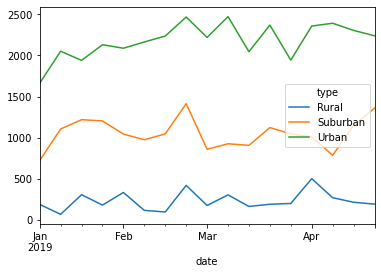

In [61]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
resampled_df.plot()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

